## 🥇<b> NB03 - Rankings </b>

#### Now that I have decided on my cities and gotten their raininess data, I will analyse which is the rainiest. 

#### I will do this by:
1) Ranking the cities from 1-5 based on their raininess every day between 2021-01-01 and 2024-01-01
2) Rank the cities on how many times they have ranked number 1 in the raininess charts
3) See which city is the rainiest of them all

In [1]:
## Importing packages
import pandas as pd
import os
import json
import requests
import numpy as np

from functions import *

from lets_plot import *
LetsPlot.setup_html()

from lets_plot.mapping import *

from IPython.display import Image

In [8]:
## Reading original raininess dataframe and creating a raininess_rank column
df = pd.read_csv('../data/all_city_rain_df.csv')

df['raininess_rank'] = df.groupby('date')['raininess'].rank(ascending=False)

df = df.sort_values(['date', 'raininess_rank'])

print(df)

     country     city        date  raininess  raininess_rank
3288      US  Seattle  2021-01-01       12.4             1.0
0         GB   London  2021-01-01        0.4             2.0
4384      NO     Oslo  2021-01-01        0.1             3.0
1096      JP    Kyoto  2021-01-01        0.0             4.5
2192      DE   Munich  2021-01-01        0.0             4.5
...      ...      ...         ...        ...             ...
1095      GB   London  2024-01-01       10.5             1.0
2191      JP    Kyoto  2024-01-01        2.9             2.0
3287      DE   Munich  2024-01-01        0.2             3.0
4383      US  Seattle  2024-01-01        0.0             4.5
5479      NO     Oslo  2024-01-01        0.0             4.5

[5480 rows x 5 columns]


In [11]:
## Counting how many times each city ranked number 1 for raininess
city_rank_counts = df[df['raininess_rank'] == 1].groupby('city').size().reset_index(name='number_of_1_ranks')

city_rank_counts = city_rank_counts.sort_values(by='number_of_1_ranks', ascending=False)

city_rank_counts.to_csv('../data/city_rank_counts.csv', index=False)
pd.read_csv('../data/city_rank_counts.csv')

,city,number_of_1_ranks
0,Kyoto,282
1,Seattle,252
2,Munich,204
3,London,170
4,Oslo,149


In [14]:
## Exploding London, so I can visualize it separately in my plot later on
city_rank_counts['explode'] = [0.2 if c == 'London' else 0.0 for c in city_rank_counts['city']]
city_rank_counts

,city,number_of_1_ranks,explode
0,Kyoto,282,0.0
4,Seattle,252,0.0
2,Munich,204,0.0
1,London,170,0.2
3,Oslo,149,0.0


In [35]:
## Plotting my data on a piechart, with a custom colour gradient to visualize rankings
plot = (ggplot(data = city_rank_counts) + \
    geom_pie(aes(fill=as_discrete('city', order_by='number_of_1_ranks'), weight='number_of_1_ranks', explode='explode'),
             size=25,
             labels=layer_labels().line('@city').size(14)) + \
    ggsize(500, 400) + \
    ggtitle("Figure 5. Times Each City Ranked Number 1 for Raininess") + \
    scale_fill_gradient(low='#e0218a', high='light_pink') + \
    theme_void() + \
    theme(
        legend_position='none',
        plot_title=element_text(margin=[40, 0, 0, 15])))

plot

In [36]:
## Saving plot
ggsave(plot, filename='no_of_1_plot.png', path='../figures', w=5, h=4, unit='in', dpi=300)

'/files/ds105a-2024-w06-summative-deyavuz/figures/no_of_1_plot.png'

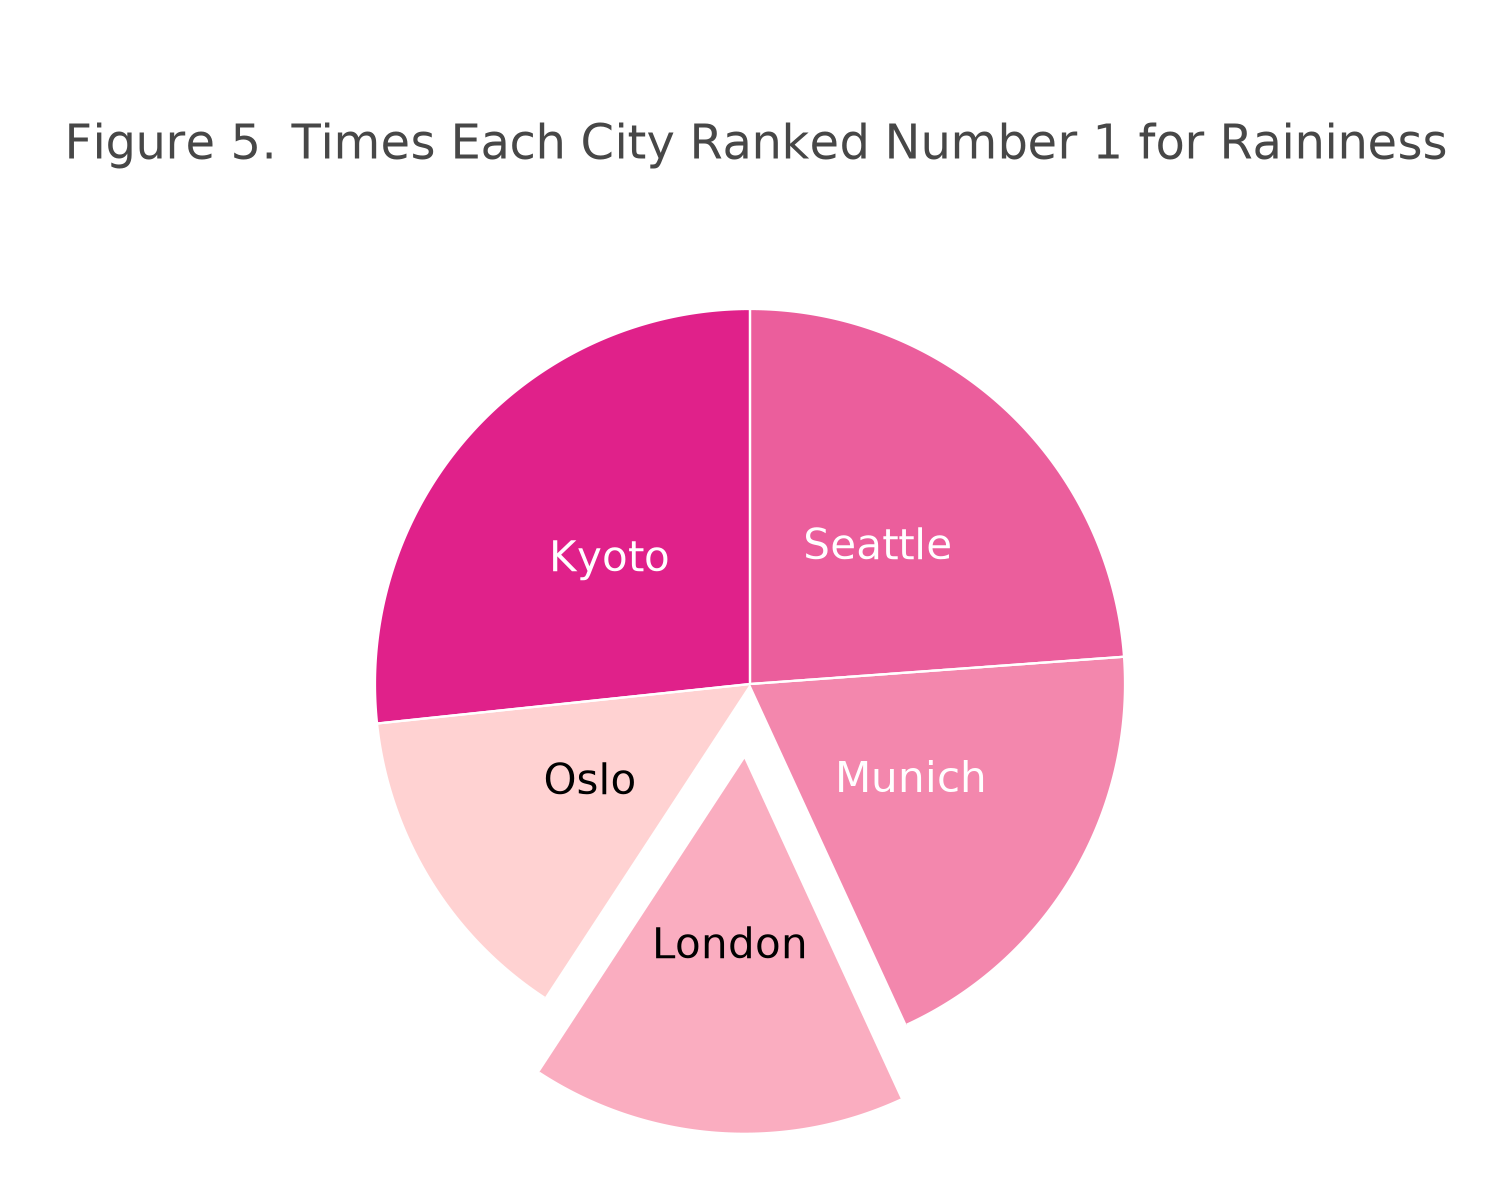

In [37]:
## Displaying plot
Image(filename='../figures/no_of_1_plot.png') 

Fig. 5 visualizes how many times each city ranked number 1 over every day from 01-01-2021 to 01-01-2024. The level of colour saturation correlates with its share of the plot (e.g., Kyoto is the largest slice, thus is the darkest pink).

Based on this plot, we can conclude that London is <b> NOT </b> the rainiest city of them all - and potentially, not as rainy as the movies make it out to be, as it ranked 4th most rainy city out of 5 movie-featured rainy cities. 

Click here to navigate to the next section, [NB04 - Summary, Results, and Next Steps](https://github.com/lse-ds105/ds105a-2024-w06-summative-deyavuz/blob/81535322f7b84ea324379ee001a1d59013b65677/code/NB04-Summary-Results-NS.ipynb)